In [12]:
from Util import datapath, StockOrders, ITCH_days,  nanoseconds_to_time, Company, ITCHtime, capped_prices, Stock, Company
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
st = Stock(abs=False)
print(sorted(st.get_list_stocks()))

['AAL', 'AAPL', 'ABBV', 'ABT', 'ABX', 'ADBE', 'ADSK', 'AEM', 'AIG', 'AMAT', 'AMJ', 'APA', 'APC', 'ARMH', 'ASML', 'ATVI', 'AXP', 'BABA', 'BAC', 'BAX', 'BBL', 'BBT', 'BEN', 'BHP', 'BK', 'BMY', 'BP', 'BTI', 'BUD', 'BXLT', 'C', 'CAM', 'CAT', 'CCL', 'CELG', 'CLR', 'CMCSA', 'CNI', 'CNQ', 'CNX', 'COF', 'COG', 'COP', 'CP', 'CRM', 'CSCO', 'CSX', 'CTSH', 'CUK', 'CVX', 'DAL', 'DDM', 'DEO', 'DFS', 'DGAZ', 'DIA', 'DIS', 'DLTR', 'DO', 'DOW', 'DUST', 'DVN', 'DWTI', 'EBAY', 'EDC', 'EDZ', 'EEM', 'EFA', 'EOG', 'ERX', 'ERY', 'ESRX', 'ESV', 'ETE', 'ETFC', 'EWZ', 'FAS', 'FAZ', 'FB', 'FCX', 'FITB', 'FNV', 'FOXA', 'FXI', 'GDX', 'GDXJ', 'GE', 'GG', 'GILD', 'GLD', 'GOLD', 'GOOG', 'GOOGL', 'GPOR', 'GSK', 'HAL', 'HD', 'HES', 'HSBC', 'INTC', 'IVV', 'IWD', 'IWM', 'IWO', 'IYR', 'JBLU', 'JD', 'JDST', 'JNJ', 'JOY', 'JPM', 'KMI', 'KO', 'KR', 'KRE', 'LBTYA', 'LBTYK', 'LNC', 'LOW', 'LVS', 'M', 'MA', 'MAR', 'MDLZ', 'MDT', 'MDY', 'MET', 'MGA', 'MPC', 'MRK', 'MRO', 'MS', 'MSFT', 'MU', 'MUR', 'MYL', 'NBL', 'NEM', 'NFLX', 'N

In [100]:
stock = 'AAL'
cmp = Company(abs=False)
print(cmp.get_company(stock))
day = ITCH_days[0]
sorders = StockOrders()
rfile = open(datapath + 'Messages/' + day + '-' + stock + '-MESSAGES.csv', 'r')
    

['APAC COAL LIMITED', 'Energy', 'n/a', 'AXS']


In [101]:
lexecutionsS = []
lexecutionsB = []
ltimeOS = []
ltimeOB = []
lpriceOS = []
lpriceOB = []
lsizeOB = []
lsizeOS = []
ldelete = []


ltimeEB = []
ltimeES = []
lpriceES = []
lpriceEB = []
ltimeEP = []   # Ordenes ocultas
lpriceEP = []
lsizeEB = []
lsizeES = []
lsizeEP = []

i = 0
norders = 0
for mess in rfile:
    data = mess.split(',')
    timestamp = ITCHtime(int(data[1].strip()))
    order = data[2].strip()
    ORN = data[3].strip()
    if order in ['F', 'A']:
        if order == 'A':
            price = float(data[7].strip())
        else:
            price = float(data[8].strip())
        sorders.insert_order(stock, order, ORN, otime=timestamp, bos=data[5].strip(), price=price, size=int(data[6].strip()))
        norders += 1
        if 0.5 < price < 1000:
            if data[5].strip() == 'B':
                lpriceOB.append(price)
                ltimeOB.append(timestamp.itime)
                lsizeOB.append(int(data[6].strip()))
            else:
                lpriceOS.append(price)
                ltimeOS.append(timestamp.itime)
                lsizeOS.append(int(data[6].strip()))
    if order == 'U':
        nORN =  data[4].strip()
        sorders.insert_order(stock, order, nORN, timestamp, updid=ORN, price=float(data[6].strip()), size=int(data[5].strip()))
    # Computes the time between placing and order and canceling it
    if order == 'D':
        trans = sorders.query_id(ORN)
        ldelete.append(timestamp.itime - trans[1])
        sorders.insert_order(stock, order, ORN)
    # Computes the time between placing and order and its execution
    if order in ['E', 'C']:
        trans = sorders.query_id(ORN)
        if trans[2] == 'S':
            lexecutionsS.append(timestamp.itime - trans[1])
            ltimeES.append(timestamp.itime)
            lpriceES.append(trans[3])
            lsizeES.append(trans[4])
        else:
            lexecutionsB.append(timestamp.itime - trans[1])
            ltimeEB.append(timestamp.itime)
            lpriceEB.append(trans[3])
            lsizeEB.append(trans[4])
    if order in ['P']:
        ltimeEP.append(timestamp.itime)
        lpriceEP.append(float(data[7].strip()))
        lsizeEP.append(int(data[6].strip()))

In [102]:
print('Stock:', stock, 'Day:', day)
print('N Buy/Sell orders:', norders)
print('N Order Executions Sell:', len(lexecutionsS))
print('Mean time to execution:', nanoseconds_to_time(np.mean(lexecutionsS)))
print('Max time to execution:', nanoseconds_to_time(np.max(lexecutionsS)))
print('Min time to execution:', nanoseconds_to_time(np.min(lexecutionsS)))
print('N Order Executions Buy:', len(lexecutionsB))
print('Mean time to execution:', nanoseconds_to_time(np.mean(lexecutionsB)))
print('Max time to execution:', nanoseconds_to_time(np.max(lexecutionsB)))
print('Min time to execution:', nanoseconds_to_time(np.min(lexecutionsB)))
print('N Hiden Executions:', len(ltimeEP))



Stock: AAL Day: 12302015
N Buy/Sell orders: 131203
N Order Executions Sell: 4117
Mean time to execution: 00:01:00.671.321.418
Max time to execution: 02:27:21.982.713.174
Min time to execution: 00:00:00.000.001.523
N Order Executions Buy: 4386
Mean time to execution: 00:01:21.003.079.780
Max time to execution: 03:49:05.590.494.768
Min time to execution: 00:00:00.000.003.039
N Hiden Executions: 1052


<IPython.core.display.Javascript object>


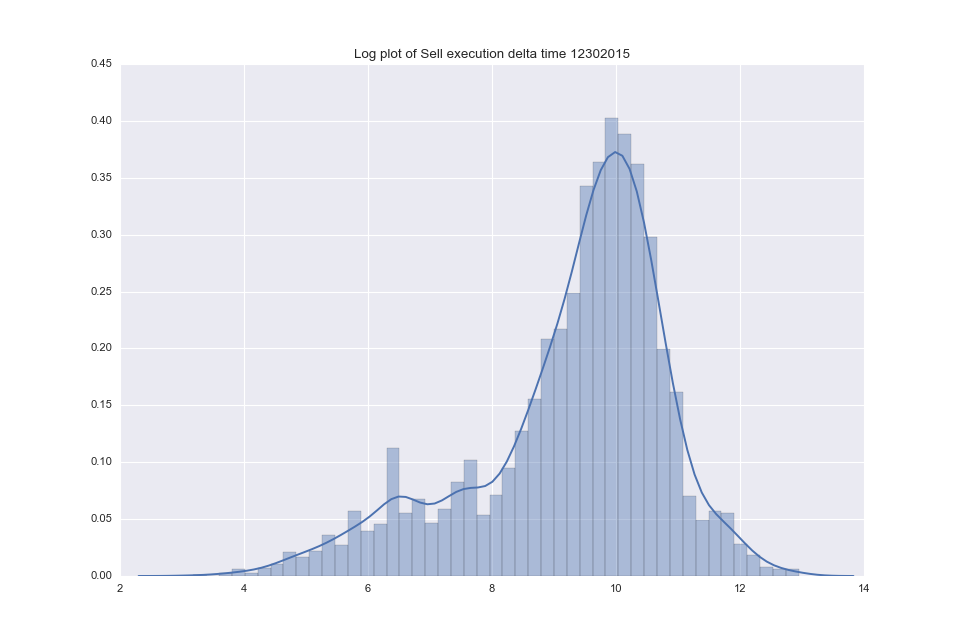

In [103]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(np.log10(lexecutionsS), kde=True, norm_hist=True)
plt.title('Log plot of Sell execution delta time ' + day)
plt.show()


<IPython.core.display.Javascript object>


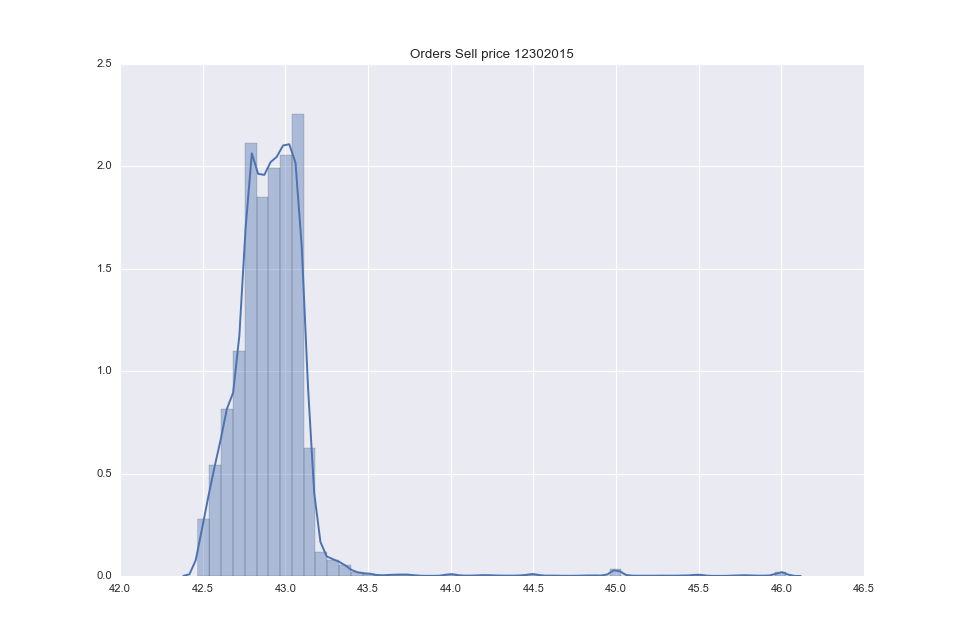

In [104]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(capped_prices(lpriceOS),  kde=True, norm_hist=True)
plt.title('Orders Sell price ' + day)
plt.show()


<IPython.core.display.Javascript object>


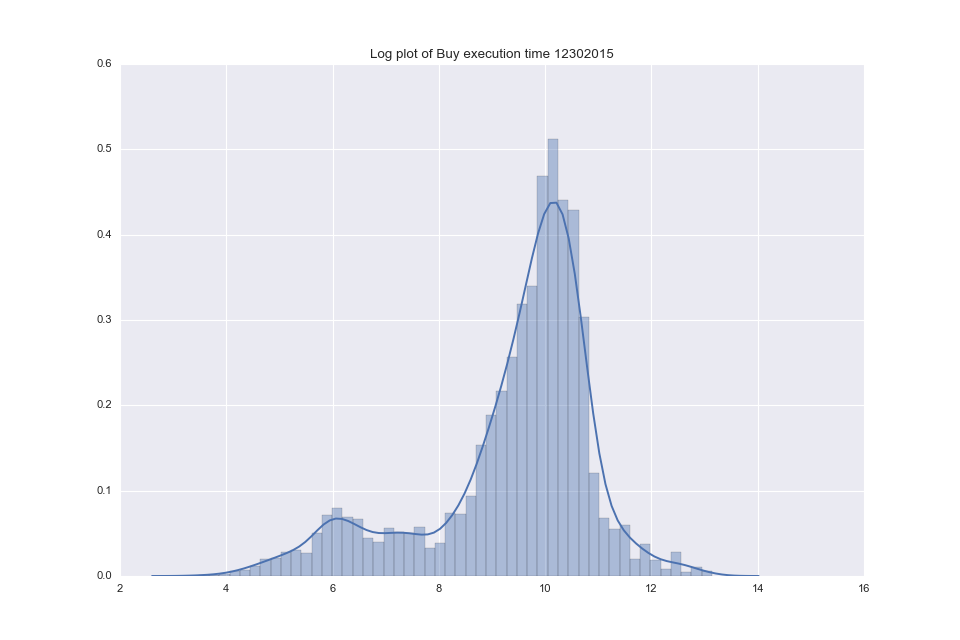

In [105]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(np.log10(lexecutionsB),  kde=True, norm_hist=True)
plt.title('Log plot of Buy execution time ' + day)
plt.show()

<IPython.core.display.Javascript object>


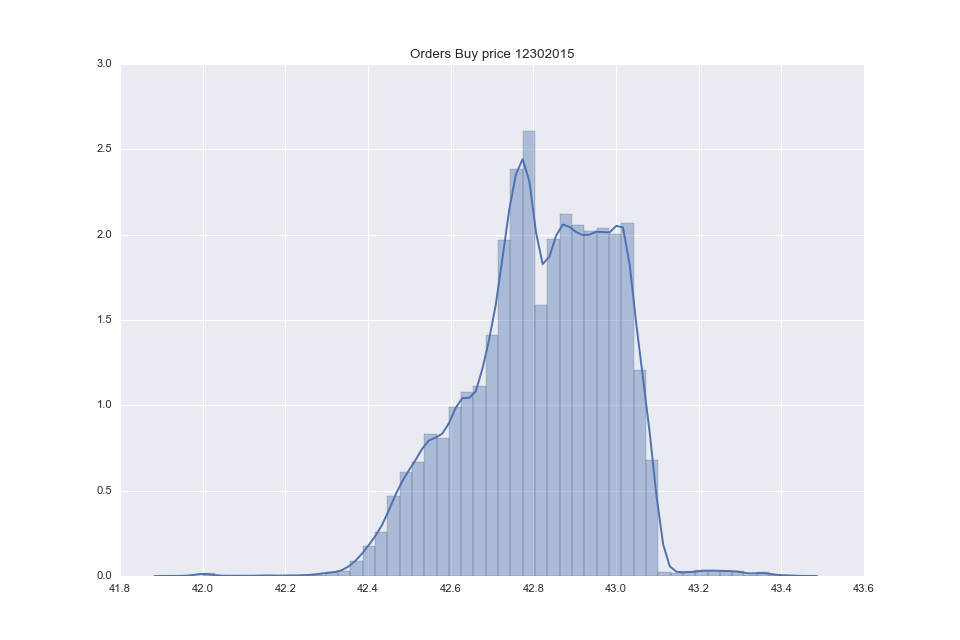

In [106]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(capped_prices(lpriceOB),  kde=True, norm_hist=True)
plt.title('Orders Buy price ' + day)
plt.show()


<IPython.core.display.Javascript object>


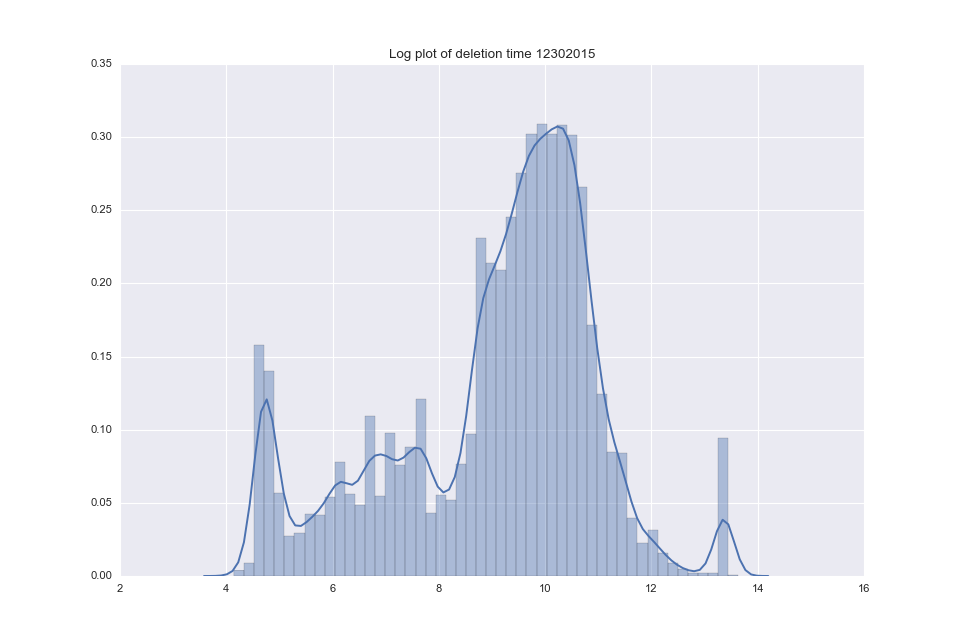

In [107]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(np.log10(ldelete), kde=True, norm_hist=True)
plt.title('Log plot of deletion time ' + day)
plt.show()

<IPython.core.display.Javascript object>


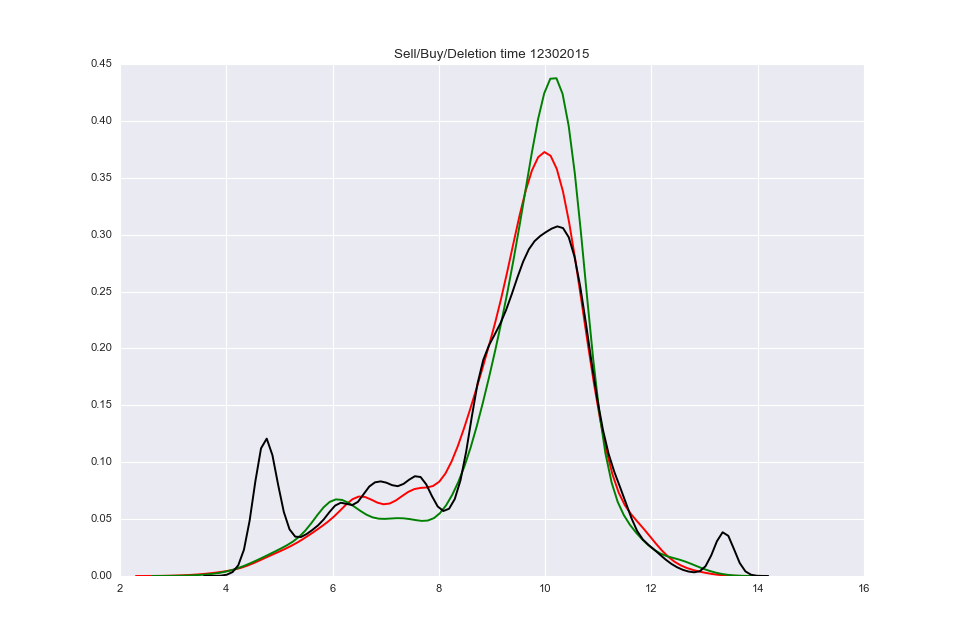

In [108]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(np.log10(lexecutionsS),  kde=True, hist=False, color='r')
ax = sns.distplot(np.log10(lexecutionsB),  kde=True, hist=False, color='g')
ax = sns.distplot(np.log10(ldelete),  kde=True, hist=False, color='k')
plt.title('Sell/Buy/Deletion time ' + day)
plt.show()

<IPython.core.display.Javascript object>


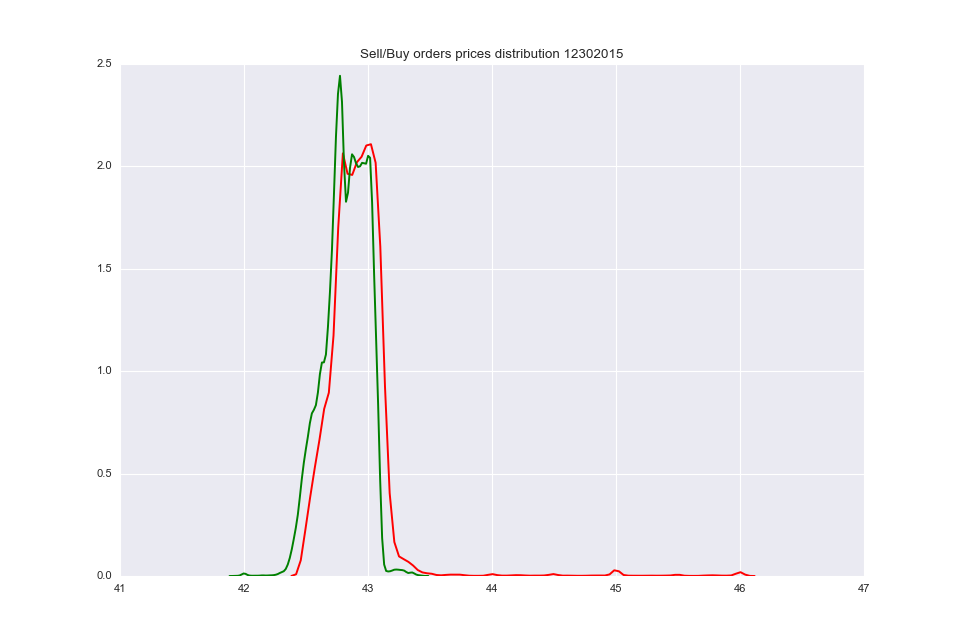

In [109]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(capped_prices(lpriceOS),  kde=True, hist=False, color='r')
ax = sns.distplot(capped_prices(lpriceOB),  kde=True, hist=False, color='g')
plt.title('Sell/Buy orders prices distribution ' + day)
plt.show()


<IPython.core.display.Javascript object>


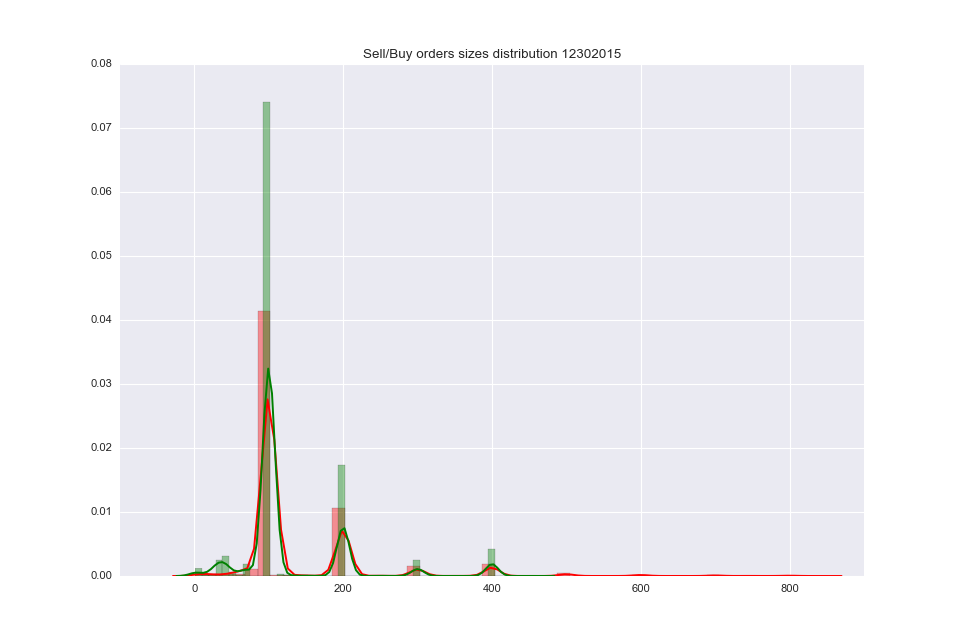

In [110]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(capped_prices(lsizeOS),  kde=True, hist=True, color='r')
ax = sns.distplot(capped_prices(lsizeOB),  kde=True, hist=True, color='g')
plt.title('Sell/Buy orders sizes distribution ' + day)
plt.show()
 

<IPython.core.display.Javascript object>


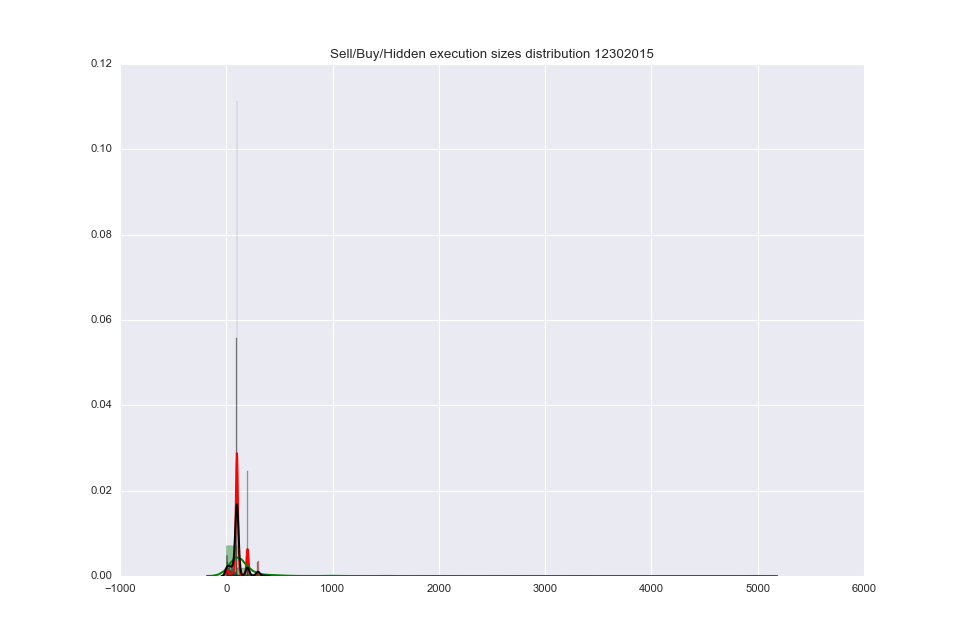

In [111]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(capped_prices(lsizeES),  kde=True, hist=True, color='r')
ax = sns.distplot(capped_prices(lsizeEB),  kde=True, hist=True, color='g')
ax = sns.distplot(capped_prices(lsizeEP),  kde=True, hist=True, color='k')
plt.title('Sell/Buy/Hidden execution sizes distribution ' + day)
plt.show()


<IPython.core.display.Javascript object>


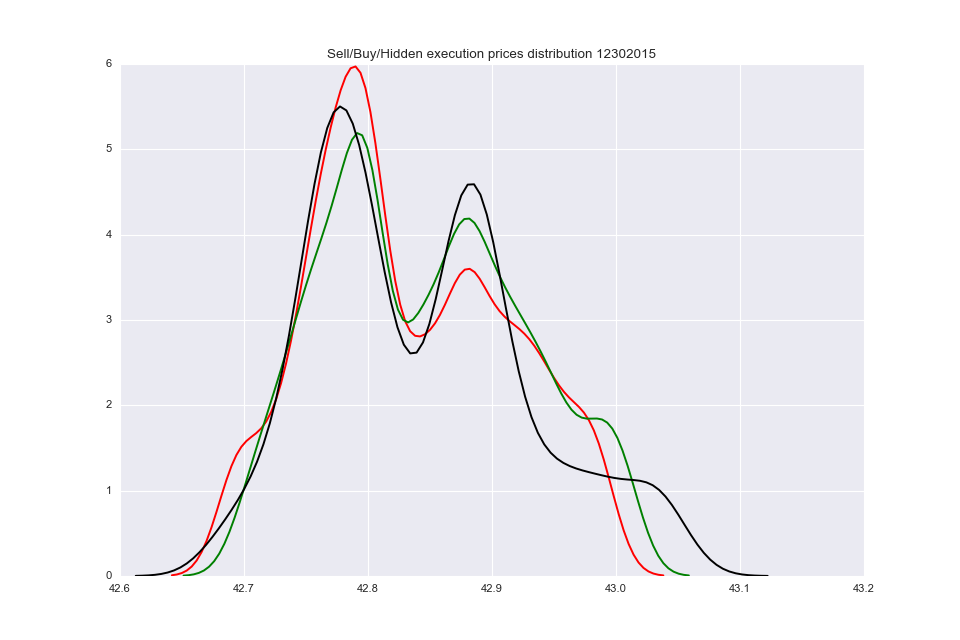

In [112]:
fig = plt.figure(figsize=(12,8))
ax = sns.distplot(capped_prices(lpriceES),  kde=True, hist=False, color='r')
ax = sns.distplot(capped_prices(lpriceEB),  kde=True, hist=False, color='g')
ax = sns.distplot(capped_prices(lpriceEP),  kde=True, hist=False, color='k')
plt.title('Sell/Buy/Hidden execution prices distribution ' + day)
plt.show()
 

<IPython.core.display.Javascript object>


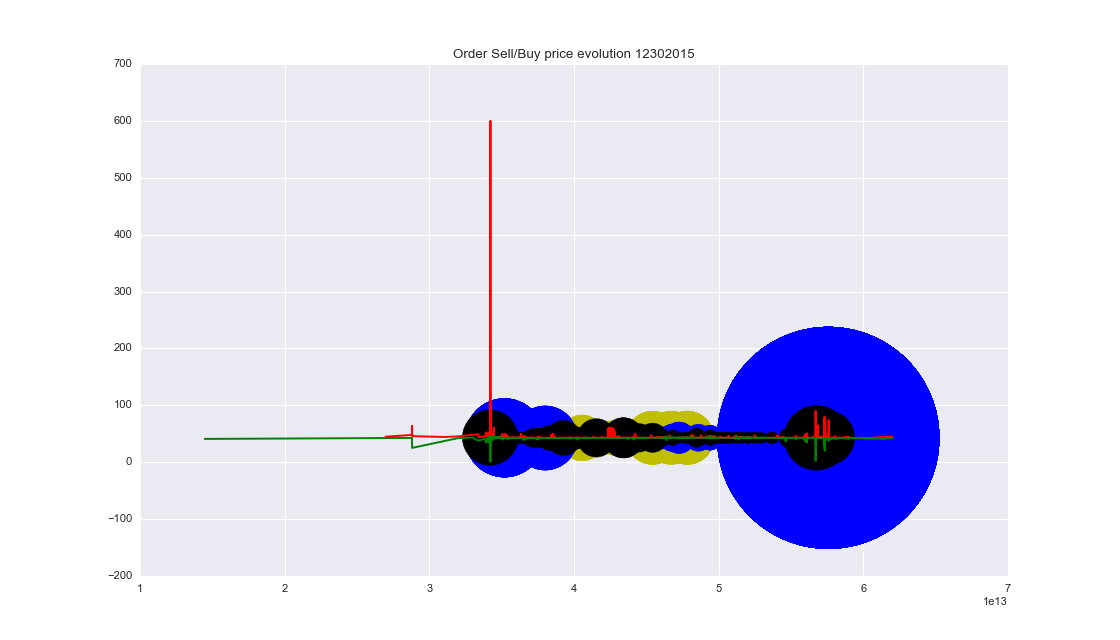

In [113]:
fig = plt.figure(figsize=(14,8))
plt.plot(ltimeOS, lpriceOS, color='r')
plt.plot(ltimeOB, lpriceOB, color='g')
plt.scatter(ltimeES, lpriceES,  marker='o', color='y', s=lsizeES)
plt.scatter(ltimeEB, lpriceEB,  marker='o', color='b', s=lsizeEB)
plt.scatter(ltimeEP, lpriceEP, marker='o', color='k', s=lsizeEP)

plt.title('Order Sell/Buy price evolution ' + day)
plt.show()